<a href="https://colab.research.google.com/github/esusrutha/zeroshot/blob/main/S_BERT_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install nltk networkx

In [4]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=768afe78b420ce9afca4307850c14d3c52c5fc537992604561c3f4d1687ab800
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


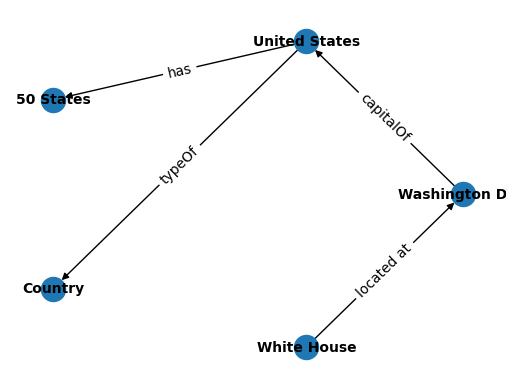

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# Define the nodes and relations
knowledge_graph = [
    ('Washington D.C.', 'capitalOf', 'United States'),
    ('United States', 'has', '50 States'),
    ('United States', 'typeOf', 'Country'),
    ('White House', 'located at', 'Washington D.C.')
]

# Create a NetworkX graph
graph = nx.DiGraph()  # Use DiGraph instead of Graph to indicate directed edges

# Iterate through the knowledge graph and retrieve additional information from ConceptNet API
for edge in knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]

    # Make a request to ConceptNet API to fetch additional information
    api_url = f'http://api.conceptnet.io/c/en/{source}?rel=/r/{relation}&end=/c/en/{target}'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()

        # Extract the weight from the API response
        weight = 1.0  # Default weight if not found
        if 'edges' in data and len(data['edges']) > 0 and 'weight' in data['edges'][0]:
            weight = data['edges'][0]['weight']

        # Add directed edges to the graph
        graph.add_edge(source, target, relation=relation, weight=weight)

# Set node positions using a circular layout
pos = nx.circular_layout(graph)

# Draw nodes and edges with arrowheads
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos, arrows=True)  # Set arrows=True for directed edges

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()
Knowledge_graph = graph

In [6]:
sentences = []
for edge in Knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]
    sentence = f"{source} {relation} {target}"
    sentences.append(sentence)
    print(sentences)

['W a s']
['W a s', 'U n i']
['W a s', 'U n i', '5 0  ']
['W a s', 'U n i', '5 0  ', 'C o u']
['W a s', 'U n i', '5 0  ', 'C o u', 'W h i']


In [7]:
!pip install nltk

In [8]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.tokenize import word_tokenize
from collections import Counter

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
word_counts = Counter([word for sentence in tokenized_sentences for word in sentence])
vocabulary = list(word_counts.keys())


In [11]:
import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-300')


[==================================================] 100.0% 376.1/376.1MB downloaded


In [12]:
word_vectors = {word: glove_model[word] for word in vocabulary if word in glove_model}


In [13]:
knowledge_graph_embedding = []
for sentence in tokenized_sentences:
    sentence_vectors = [word_vectors[word] for word in sentence if word in word_vectors]
    if sentence_vectors:
        avg_vector = sum(sentence_vectors) / len(sentence_vectors)
        knowledge_graph_embedding.append(avg_vector)


In [14]:
for embedding in knowledge_graph_embedding:
    print(embedding)


[ 6.44499063e-03  7.04779997e-02 -2.04746008e-01 -3.02250028e-01
 -2.79864997e-01 -1.29079998e-01 -1.67080000e-01  2.46784002e-01
 -6.71100095e-02 -1.54159999e+00 -8.36150050e-02  2.43716493e-01
 -1.91754997e-01  3.93995009e-02  2.03174993e-01  1.21469989e-01
 -2.28782505e-01  1.19687997e-01  8.91035050e-02 -1.85551494e-01
 -1.91806510e-01  7.31249973e-02 -3.33999991e-02  2.77666003e-01
  2.62699872e-02 -1.45697504e-01  5.94327487e-02 -2.38749981e-02
  2.22784489e-01 -4.25550006e-02 -4.30215001e-01  5.12830019e-01
 -3.20445001e-01  1.12925008e-01 -7.92150021e-01  2.06495017e-01
 -2.87100077e-02 -6.27699941e-02 -2.32075006e-01  3.11802566e-01
  1.57115012e-01  2.48290002e-01 -3.07954997e-01  2.69558489e-01
 -1.36789992e-01 -1.86560005e-01  1.90310001e-01 -1.00961506e-01
 -2.76360005e-01 -8.73314515e-02 -2.46174991e-01  9.85570028e-02
  1.65069997e-02  1.41652495e-01  1.29753992e-01 -2.57650018e-02
 -1.27930000e-01 -1.71725005e-01  2.24216506e-01 -2.86704987e-01
 -2.47759998e-01  3.50775

In [15]:
from sentence_transformers import SentenceTransformer, models


In [16]:
model_name =SentenceTransformer('bert-base-nli-mean-tokens')


In [17]:
from sentence_transformers import SentenceTransformer

model_name = 'bert-base-nli-mean-tokens'
sbert_model = SentenceTransformer(model_name)

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import nltk
from transformers import AutoTokenizer

# Load the pre-trained S-BERT model tokenizer
model_name = "sentence-transformers/bert-base-nli-mean-tokens"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Download the list of common English words from nltk
nltk.download("words")
common_words = set(nltk.corpus.words.words())

# Get the vocabulary words from the S-BERT model
vocab = tokenizer.get_vocab()
vocab_words = list(vocab.keys())

# Filter the vocabulary words to keep only the common English words
common_vocab_words = [word for word in vocab_words if word.lower() in common_words]

# Get the most common vocabulary words based on their frequencies
top_n = 50
common_vocab_freqs = [vocab[word] for word in common_vocab_words]
most_common_vocab = sorted(zip(common_vocab_words, common_vocab_freqs), key=lambda x: x[1], reverse=True)[:top_n]

# Store the most common vocabulary words in a list
stored_words = [word for word, _ in most_common_vocab]

# Print the stored vocabulary words
for word in stored_words:
    print(word)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


thyroid
nitrate
genealogical
dowry
collarbone
arsenic
pudding
disgrace
wreath
wince
inhuman
bobbed
papyrus
flourishing
penitentiary
inflated
boredom
abolitionist
squeak
enthusiast
infiltrate
upstate
rosewood
patrice
vet
foreigner
colossal
earthly
deprivation
taluka
stanza
embroidery
adventurer
unbroken
lough
adamant
polka
boardwalk
reindeer
attache
persist
enamel
effortlessly
yearning
loosen
ie
decorate
covent
strive
tread


In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
vocabulary_embeddings=model.encode(stored_words)
print(vocabulary_embeddings)

[[ 0.4887316   0.06500868  0.47772422 ... -0.40955648  0.46699142
   0.07069289]
 [ 0.04716921  0.11385528  1.4651852  ...  0.26741937  0.7261961
   0.02695823]
 [-0.12113438  0.06735776  1.866991   ... -0.4632953  -0.17647363
   0.27586946]
 ...
 [-0.2912015  -0.5358622   2.1869428  ... -0.28055057 -0.13021672
   0.34846464]
 [ 0.25023955 -0.3493019   2.8944747  ... -0.4670918  -0.5353251
  -0.12669642]
 [ 0.5686533   0.12271688  2.1050196  ...  0.25418982 -0.1013087
   0.20984882]]


In [21]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}

In [22]:
knowledge_graph_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embeddings in knowledge_graph_embedding:
    print(embeddings)


[-0.60309    0.43521    0.34076   -0.19945   -0.18648   -0.15395
 -0.3279    -0.18652   -0.10225   -0.27165   -0.81234    0.16711
 -0.65959   -0.093957  -0.65127    0.27834   -0.065087  -0.025754
 -0.46885    0.56334   -0.98922   -1.0424     0.15841   -0.53695
 -1.0966    -0.11377    0.12691   -0.28586   -0.38626    0.04408
  0.0095898  0.46223    0.40411   -0.35763    0.24802   -0.44011
 -0.049788   0.083146   0.23668    0.42204   -0.28741    0.45853
  0.42975   -1.1337    -0.010538  -0.064561  -0.30434    0.29693
 -0.51822    0.1545    -0.6576     0.19796    0.70584   -0.14076
 -0.30189   -0.38828   -0.26378    0.29245    0.50493    0.52774
 -0.15774   -0.13065    0.86067   -0.76376   -0.52396   -0.34766
 -0.76526    1.2282    -0.56637    0.40671    0.64794    0.2427
  0.37366    0.16699   -0.048311  -0.8844    -0.58703   -0.74998
  0.19419    0.25094   -0.28921    0.2612     0.85479    0.52452
 -0.29366    1.0324    -0.044289  -0.090738  -0.42323   -0.22433
 -0.50208   -0.052621  -0

In [23]:
import numpy as np

def learn_projection_matrix(embeddings, Y):
    # Center the S-BERT embeddings
    embeddings_centered = embeddings - np.mean(embeddings, axis=0)

    # Center the knowledge graph embeddings
    embedding_centered = embedding - np.mean(Y, axis=0)

    # Perform singular value decomposition on X
    U, S, VT = np.linalg.svd(embeddings_centered, full_matrices=False)

    # Construct the projection matrix
    P = VT.T @ U.T

    # Project the centered knowledge graph embeddings
    embedding_projected = embeddings_centered @ P

    return P, embedding_projected


# Assume X and Y are the S-BERT embeddings and knowledge graph embeddings respectively

# Generate random S-BERT embeddings and knowledge graph embeddings for demonstration
np.random.seed(42)
embeddings = np.random.rand(100, 50)
embedding = np.random.rand(100, 100)

# Learn the projection matrix
projection_matrix, projected_embeddings = learn_projection_matrix(embeddings, embedding)

# Print the projection matrix
print("Projection Matrix:")
print(projection_matrix)

# Print the projected knowledge graph embeddings
print("Projected Knowledge Graph Embeddings:")
print(projected_embeddings)


Projection Matrix:
[[-0.09530814  0.17247475 -0.09358466 ...  0.14192177 -0.1597433
  -0.03208431]
 [ 0.12331812  0.09035316  0.07318327 ... -0.00850685 -0.00285291
  -0.13983809]
 [ 0.06349116  0.14512936 -0.14235402 ...  0.08170926 -0.12210049
   0.02182195]
 ...
 [-0.00057901  0.09942775  0.02374778 ... -0.07940023  0.06602151
  -0.10459959]
 [-0.01308586 -0.15820529 -0.14251553 ... -0.1463997   0.06872969
   0.10336344]
 [-0.11006908 -0.08220933 -0.03814088 ...  0.16363046  0.1060267
  -0.01839051]]
Projected Knowledge Graph Embeddings:
[[ 1.29982025 -0.02232146 -0.10162462 ... -0.03898049 -0.36609878
  -0.02276538]
 [-0.02232146  1.55056445 -0.08702494 ... -0.05133531 -0.23956438
  -0.0634575 ]
 [-0.10162462 -0.08702494  1.49006846 ...  0.00516557  0.02108053
   0.14986073]
 ...
 [-0.03898049 -0.05133531  0.00516557 ...  1.37167816 -0.03615348
  -0.33672569]
 [-0.36609878 -0.23956438  0.02108053 ... -0.03615348  1.32426477
  -0.04661303]
 [-0.02276538 -0.0634575   0.14986073 ... -

In [24]:
!pip install scikit-learn

In [25]:
!pip install -U sentence-transformers

In [26]:
!pip install nltk

In [27]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the list of categories
categories_list = newsgroups_data.target_names

# Preprocess and extract sentences from each category
for category in categories_list:
    # Initialize a list to store preprocessed sentences
    preprocessed_sentences = []

    # Get documents for the current category
    documents = fetch_20newsgroups(subset='all', categories=[category])

    for document in documents.data:
        # Remove question marks, special symbols, numbers, and URLs
        text = re.sub(r'\?', '', document)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'http\S+|www\S+', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text into sentences
        sentences = sent_tokenize(text)

        # Preprocess and add sentences to the list
        for sentence in sentences:
            # Remove leading/trailing whitespaces
            sentence = sentence.strip()

            # Skip empty sentences
            if not sentence:
                continue

            preprocessed_sentences.append(sentence)

    # Print the preprocessed sentences
    for sentence in preprocessed_sentences:
        print(sentence)
    print("\n")


from acoopermacccmacalstredu turin turambar me department of utter misery
subject re societally acceptable behavior
organization macalester college
lines 

in article csasnewscsouiucedu cobbalexialisuiucedu mike cobb writes
 i guess im delving into a religious language area  what exactly is morality 
 or morals  

i hope there is not one with a subject like this you just have a spiral  what
would then be a morality of a morality of morals  labels dont make arguments 
one really needs a solid measuring stick by which most actions can be
interpreted even though this would hardly seem moral  for example the best
thing for me is to ensure that i will eat and drink enough  hence all actions
must be weighed against this one statement  whatever helps this goal is
moral whatever does not is immoral

of course this leads such a blank space there are so many different ways to
fulfill a goal one would need a hypermorality to apply to just the methods

i never thought of eating meat to be moral or

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

please email me any info  if i get anything interesting ill compile
it and get it on the net  thanks

   
   marty capadona                              martycartercaboeingcom
                                               seattle wa
    gpz  gs  hawk gt  gs
   ama msf wmrra omrra                   forget what i said
from tobiasconvexcom allen tobias
subject re type spesifications cb vfr gt etc
nntppostinghost hydraconvexcom
organization convex computer corporation richardson tx usa
xdisclaimer this message was written by a user at convex computer
              corp the opinions expressed are those of the user and
              not necessarily those of convex
lines 

in article rvklnragateberkeleyedu robinsoncogsciberkeleyedu michael robinson writes
in article apradobecom cjacksonadobecom curtis jackson writes
in article cskdcpsrgenprpsrhpcom frankbsadhpcom frank ball writes
honda  a v designates a v engine street bike vf for v
vt for

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
organization tripos associates inc
lines 

i recently learned about these devices that supposedly induce specific 
brain wave frequencies in their users simply by wearing them mind machines
consist of led gogles head phones and a microprocessor that controls them
they strobe the closed eye and send sound pulses in sync with the flashing
leds i understand that these devices are experimental but they are available
ive heard claims that they can induce sleep and light trance states for
relaxation essentially they are supposed to work without aid of drugs etc
i would think that if they work as reported they would be incredibly useful
the few sources ive seen are biased they are selling the things and a
friend who has tried them claims that every home should have one so 
do these mind machines aka light and sound machines work can they induce
alpha theta andor delta waves in a person wearing them what research if
any has been done on them c

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
proving whether or not something can be proven or disproven there are
theories on provability in the field of logic by the way and actually
proving or disproving it  the other logical error we must avoid falling
into is the converse that if something cannot be proven then it is
false  this seems to be the error of many sola scriptura believers

   i think the only thing that can be proven here is that one cannot use
scripture alone to prove something either way about infant baptism
although the evidence seems to me to favor it

									
steve creps indiana university
crepslateranucsindianaedu
from bluelobstercmuedu david o hunt
subject re how i got saved
organization carnegie mellon pittsburgh pa
lines 

my first and most important point is that regardless of how your recovery
happened im glad it did

on may in re how i got saved       
user karen laurocamelotbrad writes
	i found it ore than coincidental that less than  weeks after
i 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from bobcoscom bob blackshaw
subject re tieing abortion to health reform  is clinton nuts
organization corporation for open systems
distribution world 
lines 

in aprringercsutsaedu sboothlonestarutsaedu simon e booth writes

in article aprwdlloralcom bardcutterssdloralcom writes
sboothlonestarutsaedu simon e booth writes
 sandviknewtonapplecom kent sandvik writes
 we already kill people death penalty and that costs even more
 money so you could as well complain about this extremely barbaric
 way of justice

 but the death penalty is right

 and how expensive can an execution be i mean i think rope cyanide
 for the gas or the rifles and ammunition to arm firing squads are
 affordable

 now perhaps lethal injection might be expensive in that case lets
 return to the more efficient methods employed in the past

oh sure the death penalty is fairly inexpensive but the trial and
sentencing can run millions


strychnine	unless you wanna cut costs by skipping the trial and
 sentencing you mur

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
print(newsgroups_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentences_embeddings=model.encode(sentence)
print(sentences_embeddings)

[ 1.09040253e-02  1.33285344e+00  6.66448712e-01  1.34605080e-01
 -5.37390076e-03 -5.14817715e-01  1.49951875e+00 -3.78864348e-01
  2.08912827e-02 -1.36235312e-01 -5.53271055e-01  4.55447197e-01
  2.11144667e-02  4.65425134e-01 -1.01658332e+00  8.43070626e-01
 -2.37012118e-01 -3.39166582e-01 -3.07052672e-01  1.24860376e-01
 -2.88823456e-01 -6.65833354e-01  5.14435291e-01  4.39306408e-01
  1.37753367e+00  1.06917989e+00 -2.22981274e-01  5.54556809e-02
 -1.87858999e+00  5.81222057e-01 -1.29639447e-01 -1.96235284e-01
 -3.03638667e-01 -6.40681013e-02 -1.47274435e-01  6.71839833e-01
  6.75201416e-01 -4.76230741e-01  3.70623231e-01  1.99202403e-01
 -1.18417293e-01  3.49693447e-01 -2.60720611e-01 -2.06658002e-02
 -3.42278302e-01 -2.76799947e-02  1.12435544e+00  3.08227062e-01
  5.06314337e-01 -7.84928381e-01  6.58134222e-01  4.43810493e-01
  3.36649120e-01  1.12226516e-01  1.45687491e-01 -7.20396757e-01
  4.11478393e-02 -1.00916481e+00 -8.52265596e-01 -7.12945640e-01
 -1.47198367e+00  3.36915

In [31]:
import numpy as np

def project_embedding(sentences_embeddings, projection_matrix):
    # Subtract the mean from the embedding
    embedding_centered = sentences_embeddings - np.mean(embedding)

    # Project the embedding using the projection matrix
    projected_embeddings = embedding_centered @ projection_matrix

    return projected_embeddings

# Example usage
# Assume embedding is the S-BERT embedding you want to project

# Generate a random S-BERT embedding for demonstration
np.random.seed(42)
sentences_embeddings = np.random.rand(50)

# Project the embedding using the learned projection matrix
projected_embeddings = project_embedding(sentences_embeddings, projection_matrix)

# Print the projected embedding
print("Projected Embedding:")
print(projected_embeddings)


Projected Embedding:
[ 1.30687387 -0.04066706 -0.14628928  0.01860598 -0.09940461 -0.19209218
 -0.3207663   0.22204765  0.12335827  0.09156268 -0.02368809  0.08025284
  0.24590313  0.53629613 -0.05336272  0.10569727  0.083366   -0.01159127
 -0.22880577 -0.04092621  0.07965568  0.04537846 -0.02398593  0.07835251
 -0.13146179 -0.00461352  0.30216537 -0.06756688 -0.25300457 -0.12719156
 -0.18447022  0.0739523   0.2264946  -0.26333713 -0.10873587 -0.20317393
  0.06942004 -0.11394629  0.06835577 -0.22175881  0.16061691  0.24131903
 -0.07296041  0.15361611 -0.06762081 -0.01031447  0.07777875 -0.16042893
 -0.15836235 -0.12879169  0.15762891 -0.1136452  -0.04935963  0.02364582
  0.13731189  0.04068367  0.22599701 -0.11199133 -0.07053913 -0.11315466
 -0.35083914  0.00833267 -0.12750509 -0.22199958  0.12972984 -0.03064747
 -0.00564203 -0.20982909  0.018925    0.0257289  -0.13988713 -0.23355649
  0.01704343  0.00177938 -0.24888046  0.2867737  -0.02523299  0.03237498
 -0.08983364  0.10000682  0.32

In [32]:
from nltk.draw.table import Label
def categorize_classes(newsgroups_data):
    label = {
        "Computer": ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware"],
        "Religion": ["alt.atheism", "soc.religion.christian", "talk.religion.misc"],
        "Sports": ["rec.sport.baseball", "rec.sport.hockey"],
        "Politics": ["talk.politics.guns", "talk.politics.mideast", "talk.politics.misc"],
        "Vehicle": ["rec.autos", "rec.motorcycles"],
        "Science": ["sci.crypt", "sci.electronics", "sci.med", "sci.space"]
    }

    categorized_classes = {}

    for category, label_list in label.items():
        categorized_classes[category] = []
        for class_name in newsgroups_data:
            if class_name in label_list:
                categorized_classes[category].append(class_name)

    return categorized_classes

classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware","alt.atheism", "soc.religion.christian", "talk.religion.misc","rec.sport.baseball", "rec.sport.hockey","talk.politics.guns", "talk.politics.mideast", "talk.politics.misc","rec.autos", "rec.motorcycles","sci.crypt", "sci.electronics", "sci.med", "sci.space"]

categorized_classes = categorize_classes(classes)

for category, label_list in categorized_classes.items():
    print(f" '{category}': {label_list}")



 'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
 'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc']
 'Sports': ['rec.sport.baseball', 'rec.sport.hockey']
 'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']
 'Vehicle': ['rec.autos', 'rec.motorcycles']
 'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']


In [39]:
def categorize_classes(newsgroups_data):
    label = {
        "Computer": ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware"],
        "Religion": ["alt.atheism", "soc.religion.christian", "talk.religion.misc"],
        "Sports": ["rec.sport.baseball", "rec.sport.hockey"],
        "Politics": ["talk.politics.guns", "talk.politics.mideast", "talk.politics.misc"],
        "Vehicle": ["rec.autos", "rec.motorcycles"],
        "Science": ["sci.crypt", "sci.electronics", "sci.med", "sci.space"]
    }

    categorized_classes = {}

    for category, label_list in label.items():
        categorized_classes[category] = []
        for class_name in newsgroups_data:
            if class_name in label_list:
                categorized_classes[category].append(class_name)

    return categorized_classes

classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware","alt.atheism", "soc.religion.christian", "talk.religion.misc","rec.sport.baseball", "rec.sport.hockey","talk.politics.guns", "talk.politics.mideast", "talk.politics.misc","rec.autos", "rec.motorcycles","sci.crypt", "sci.electronics", "sci.med", "sci.space"]

categorized_classes = categorize_classes(classes)

for category, label_list in categorized_classes.items():
    print(f" '{category}': {label_list}")


 'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
 'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc']
 'Sports': ['rec.sport.baseball', 'rec.sport.hockey']
 'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']
 'Vehicle': ['rec.autos', 'rec.motorcycles']
 'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']


In [40]:
print(categorized_classes)

{'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'], 'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc'], 'Sports': ['rec.sport.baseball', 'rec.sport.hockey'], 'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc'], 'Vehicle': ['rec.autos', 'rec.motorcycles'], 'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']}


In [41]:
from sentence_transformers import SentenceTransformer
import numpy as np

def encode_categories(categorized_classes):
    # Load the pre-trained S-BERT model
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    encoded_categories = {}

    for category, label_list in categorized_classes.items():
        category_labels = label_list[:-1]  # Exclude the mean embedding from the labels
        category_mean_embedding = label_list[-1]

        # Encode the category labels using S-BERT
        label_embeddings = model.encode(category_labels)

        # Reshape the mean embedding to have the same dimensions as the label embeddings
        category_mean_embedding = np.tile(category_mean_embedding, (len(label_embeddings), 1))

        # Concatenate the label embeddings with the mean embedding
        category_embeddings = np.concatenate((label_embeddings, category_mean_embedding), axis=1)

        encoded_categories[category] = category_embeddings

    return encoded_categories

# Assuming you have already obtained the categorized_classes dictionary

encoded_categories = encode_categories(categorized_classes)

for category, embeddings in encoded_categories.items():
    print(f"Category: {category}")
    print(f"Embeddings: {embeddings}")
    print()


Category: Computer
Embeddings: [['-0.66692287' '-0.44592306' '1.7488915' ... '-0.16705728' '0.27120456'
  'comp.sys.mac.hardware']
 ['-0.668444' '0.35439193' '0.74814737' ... '0.22040384' '0.6642327'
  'comp.sys.mac.hardware']
 ['-0.28710216' '0.25994986' '0.45993945' ... '-0.0461305' '0.27789375'
  'comp.sys.mac.hardware']]

Category: Religion
Embeddings: [['0.11493839' '0.15126872' '1.1715368' ... '0.3586208' '-0.066010974'
  'talk.religion.misc']
 ['0.3647673' '0.52443874' '0.51779735' ... '1.0325559' '-0.4269429'
  'talk.religion.misc']]

Category: Sports
Embeddings: [['0.26388958' '-0.953574' '0.4403917' '0.52504617' '-0.31192294'
  '-0.77384704' '-0.442646' '0.69328105' '-0.47587895' '-0.9093895'
  '-0.32604218' '0.98026496' '0.2098728' '-0.26105064' '0.27757236'
  '1.2625397' '0.2569817' '0.20430286' '-0.042090684' '-0.65467817'
  '-1.5570915' '0.0863815' '-0.53827834' '-0.378459' '-0.64238775'
  '-0.2015572' '-0.26605928' '-0.08140082' '-0.7743235' '-0.14855333'
  '0.042232294'

In [45]:
from sentence_transformers import SentenceTransformer
import numpy as np

def encode_categories(categorized_classes):
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    encoded_categories = {}
    for category, label_list in categorized_classes.items():
        label_embeddings = model.encode(label_list)
        mean_embedding = np.mean(label_embeddings, axis=0)
        encoded_categories[category] = np.concatenate((label_embeddings, [mean_embedding]), axis=0)

    return encoded_categories

def project_embedding(encoded_categories, projection_matrix):
    projected_categories = {}
    for category, embeddings in encoded_categories.items():
        embeddings = embeddings.astype(float)
        embeddings_centered = embeddings - np.mean(embeddings, axis=0)
        projected_embeddings = embeddings_centered @ projection_matrix
        projected_categories[category] = projected_embeddings

    return projected_categories

# Assuming you have the categorized_classes dictionary and the projection_matrix

# Encode the categories using S-BERT
encoded_categories = encode_categories(categorized_classes)

# Example usage
# Generate a random projection matrix for demonstration
np.random.seed(42)
projection_matrix = np.random.rand(768, 100)

# Project the embeddings using the learned projection matrix
projected_categories = project_embedding(encoded_categories, projection_matrix)

# Print the projected embeddings for each category
for category, embeddings in projected_categories.items():
    print(f"Category: {category}")
    print(f"Projected Embeddings: {embeddings}")
    print()


Category: Computer
Projected Embeddings: [[ 1.81542047e+00  3.52567692e-01  7.09936810e-01 -1.10618834e+00
   1.31169562e+00 -1.48540929e-01 -3.83010758e-01 -3.39353750e+00
   1.03882565e+00  2.95751368e+00 -1.03214587e+00  2.33835215e+00
  -2.91267879e+00  2.81885085e+00  4.96142557e+00  1.36654130e+00
   3.34969844e+00  1.56719369e+00 -2.21767293e+00  1.01636240e+00
   3.34570348e-01 -1.69472730e+00  2.90525513e+00  1.00127456e+00
  -2.15697868e+00  1.87223624e+00  4.67339727e+00 -1.33574353e+00
   3.36851387e+00  3.51192059e+00 -1.15216236e+00  2.43205095e+00
  -2.69943246e+00 -1.31788778e+00 -4.87006374e-01 -3.30668846e+00
   2.05044077e+00 -3.15694469e+00 -1.14911013e+00 -4.53111522e-01
  -9.61329084e-01 -6.22036311e-01  5.47588076e+00 -5.34438556e-01
   4.10268829e+00 -2.66964517e+00 -2.57380960e+00  5.27996146e+00
  -1.84461213e+00  1.43086704e-01  5.57339857e+00 -1.27641017e+00
  -2.15539735e+00 -2.06735678e+00  1.47067185e+00  4.20799352e+00
  -7.10467254e-01  2.52368182e+00  

In [50]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(projected_embeddings, projected_categories, categories_list):
    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(projected_embeddings.reshape(1, -1), projected_categories)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
# Assume sentence_embedding is the projected embedding of a sentence
# Assume projected_embeddings is the matrix of projected embeddings for all labels
# Assume labels is the list of labels corresponding to the projected_embeddings

# Generate random projected embeddings and labels for demonstration
np.random.seed(42)
projected_embeddings = np.random.rand(100, 50)
labels = ['label1', 'label2', 'label3', ...]  # Replace ... with the remaining labels

# Generate a random sentence embedding for demonstration
projected_embeddings = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(projected_embeddings, projected_categories, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


TypeError: ignored

In [49]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(sentence_embedding, projected_categories, categories_list):
    # Convert the projected_categories dictionary to a numerical array
    projected_embeddings = np.array(list(projected_categories.values()))

    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(sentence_embedding.reshape(1, -1), projected_embeddings)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
# Assume sentence_embedding is the projected embedding of a sentence
# Assume projected_categories is the dictionary of projected embeddings for each category
# Assume categories_list is the list of category labels corresponding to the projected_categories

# Generate random projected embeddings and labels for demonstration
np.random.seed(42)
projected_embeddings = np.random.rand(100, 50)
categories_list = ['category1', 'category2', 'category3', ...]  # Replace ... with the remaining categories

# Generate a random sentence embedding for demonstration
sentence_embedding = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(sentence_embedding, projected_categories, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


<ipython-input-49-db11ea80eef6>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  projected_embeddings = np.array(list(projected_categories.values()))


ValueError: ignored